7.33 Maximum entropy distribution with quartile constraints.

In [1]:
import numpy as np
import cvxpy as cp
from matplotlib import pyplot as plt

In [25]:
N = 300
mu = - 0.1
sigma = 0.35
q25, q50, q75 = -0.3, -0.05, 0.1

In [64]:
p = cp.Variable(N, nonneg=True)
objective = cp.Maximize(2 / N * cp.sum(cp.entr(p)))
constraints = [
    2 / N * cp.sum(p) == 1,
    2 / N * p @ np.linspace(-1+2/N,1,300) == mu,
    2 / N * cp.square(np.linspace(-1+2/N,1,300) - mu) @ p  <= sigma ** 2,
    2 / N * cp.sum(p[:np.sum(np.linspace(-1+2/N,1,300) <= q25)]) == 0.25,
    2 / N * cp.sum(p[:np.sum(np.linspace(-1+2/N,1,300) <= q50)]) == 0.5,
    2 / N * cp.sum(p[:np.sum(np.linspace(-1+2/N,1,300) <= q75)]) == 0.75,
]
prob = cp.Problem(objective, constraints)
result = prob.solve()

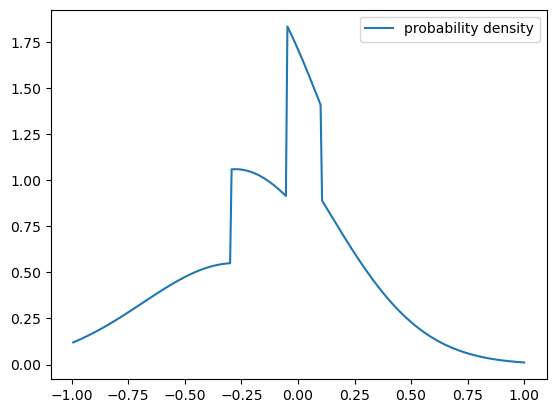

In [69]:
plt.plot(np.linspace(-1+2/N,1,300), p.value, label='probability density')
plt.legend()
plt.show()

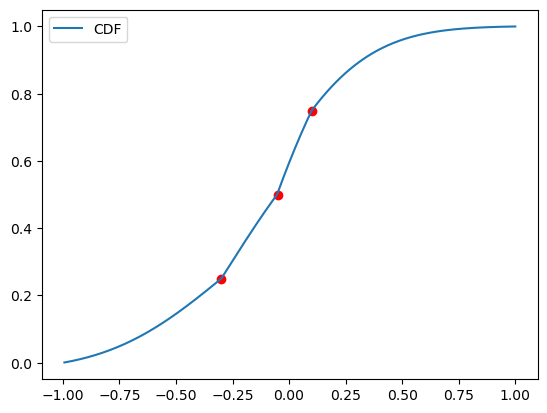

In [68]:
plt.plot(np.linspace(-1+2/N,1,300), np.cumsum(p.value)/np.sum(p.value), label='CDF')
plt.scatter([-0.3,-0.05,0.1],[0.25,0.5,0.75],c='r')
plt.legend()
plt.show()

In [61]:
p = cp.Variable(N, nonneg=True)
objective = cp.Maximize(2 / N * cp.sum(cp.entr(p)))
constraints = [
    2 / N * cp.sum(p) == 1,
    2 / N * p @ np.linspace(-1+2/N,1,300) == mu,
    2 / N * cp.square(np.linspace(-1+2/N,1,300) - mu) @ p  <= sigma ** 2,
]
prob = cp.Problem(objective, constraints)
result = prob.solve()

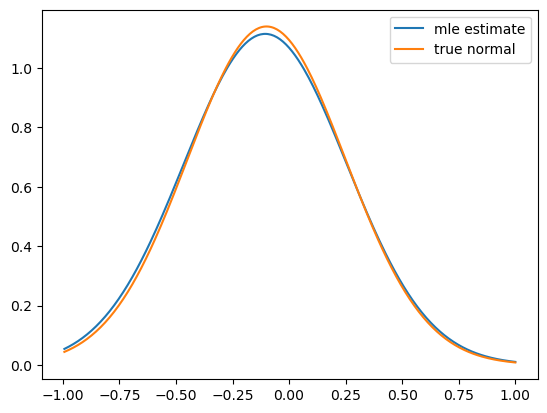

In [62]:
plt.plot(np.linspace(-1+2/N,1,300), p.value, label='mle estimate')
from scipy.stats import norm
y = norm.pdf(np.linspace(-1+2/N,1,300), mu, sigma)
plt.plot(np.linspace(-1+2/N,1,300), y, label='true normal')
plt.legend()
plt.show()